In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from keras import backend as K

import pickle
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# load data
X_train = pd.read_pickle(f'../models/X_train.pickle')
y_train = pd.read_pickle(f'../models/y_train.pickle')
X_validation = pd.read_pickle(f'../models/X_validation.pickle')
y_validation = pd.read_pickle(f'../models/y_validation.pickle')

cat: 'day_of_week_str'
numeric: store_nbr,sales,onpromotion,wage_day,

In [6]:
X_train.shape

(82044, 128)

In [8]:
# reshape X_train, X_validation
X_train_array = X_train.to_numpy()
X_validation_array = X_validation.to_numpy()
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_validation_reshaped = X_validation_array.reshape(X_validation_array.shape[0], X_validation_array.shape[1], 1)


In [9]:
X_validation_reshaped

array([[[  0.        ],
        [  0.32938529],
        [  0.        ],
        ...,
        [  0.        ],
        [  1.        ],
        [ 59.        ]],

       [[  0.        ],
        [  0.32938529],
        [  0.        ],
        ...,
        [  0.        ],
        [  1.        ],
        [ 59.        ]],

       [[  0.        ],
        [  0.32938529],
        [  0.        ],
        ...,
        [  0.        ],
        [  1.        ],
        [ 59.        ]],

       ...,

       [[  0.        ],
        [  0.25322753],
        [  0.        ],
        ...,
        [  0.        ],
        [  1.        ],
        [227.        ]],

       [[  0.        ],
        [  0.25322753],
        [  0.        ],
        ...,
        [  0.        ],
        [  1.        ],
        [227.        ]],

       [[  0.        ],
        [  0.25322753],
        [  0.        ],
        ...,
        [  0.        ],
        [  1.        ],
        [227.        ]]])

In [10]:
def rmsle(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(y_pred + 1) - K.log(y_true + 1))))

In [ ]:
# # model 1: LSTM
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=64))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))


In [11]:
# # model 2: CNN
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))


In [12]:
# model 3: LSTM + CNN 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[rmsle])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64)


Epoch 1/50


2023-05-04 16:22:41.486068: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1282/1282 [==============================] - 55s 41ms/step - loss: 0.4836 - rmsle: 0.2606
Epoch 2/50
1282/1282 [==============================] - 52s 41ms/step - loss: 0.3730 - rmsle: 0.2318
Epoch 3/50
1282/1282 [==============================] - 53s 41ms/step - loss: 0.2761 - rmsle: 0.1981
Epoch 4/50
1282/1282 [==============================] - 54s 42ms/step - loss: 0.2455 - rmsle: 0.1857
Epoch 5/50
1282/1282 [==============================] - 56s 44ms/step - loss: 0.2329 - rmsle: 0.1804
Epoch 6/50
1282/1282 [==============================] - 56s 44ms/step - loss: 0.2274 - rmsle: 0.1781
Epoch 7/50
1282/1282 [==============================] - 55s 43ms/step - loss: 0.2153 - rmsle: 0.1732
Epoch 8/50
1282/1282 [==============================] - 55s 43ms/step - loss: 0.2105 - rmsle: 0.1708
Epoch 9/50
1282/1282 [==============================] - 55s 43ms/step - loss: 0.2053 - rmsle: 0.1685
Epoch 10/50
1282/1282 [==============================] - 56s 44ms/step - loss: 0.2034 - rmsle: 0.1677


In [14]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):

    plt.figure(figsize=(10, 6))
    if type(y) is tuple:
      for y_curr in y:
        plt.plot(x[start:end], y_curr[start:end], format)
    else:
      plt.plot(x[start:end], y[start:end], format)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend:
      plt.legend(legend)

    plt.title(title)
    plt.grid(True)
    plt.show()

In [15]:
history.history.keys()

dict_keys(['loss', 'rmsle'])

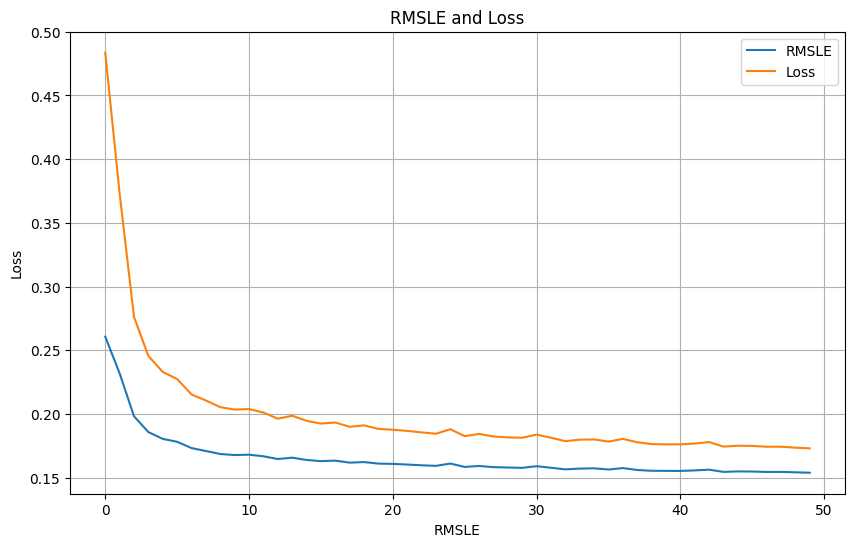

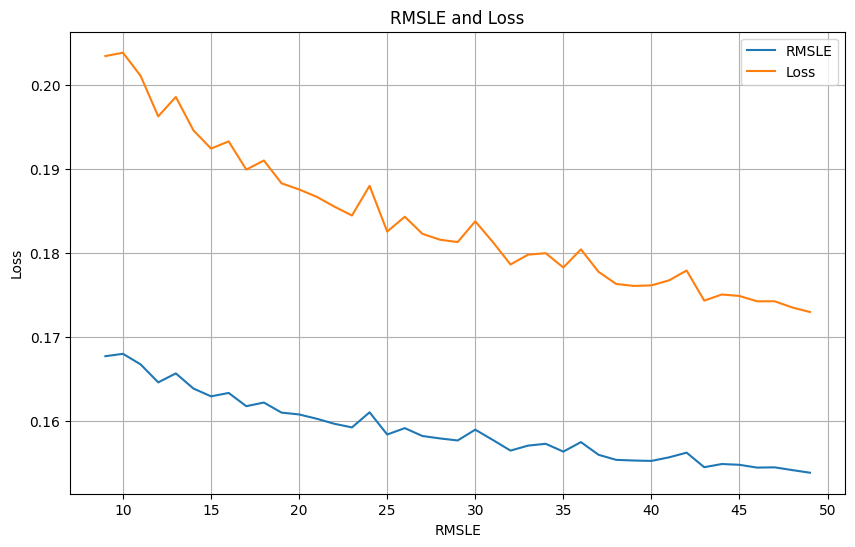

In [16]:
# Get mae and loss from history log
rmsle=history.history['rmsle']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot rmsle and loss
plot_series(
    x=epochs, 
    y=(rmsle, loss), 
    title='RMSLE and Loss', 
    xlabel='RMSLE',
    ylabel='Loss',
    legend=['RMSLE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = rmsle[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed rmsle and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='RMSLE and Loss', 
    xlabel='RMSLE',
    ylabel='Loss',
    legend=['RMSLE', 'Loss']
    )

In [17]:
# Make predictions on the validation data
y_pred = model.predict(X_validation_reshaped)


285/285 [==============================] - 2s 7ms/step


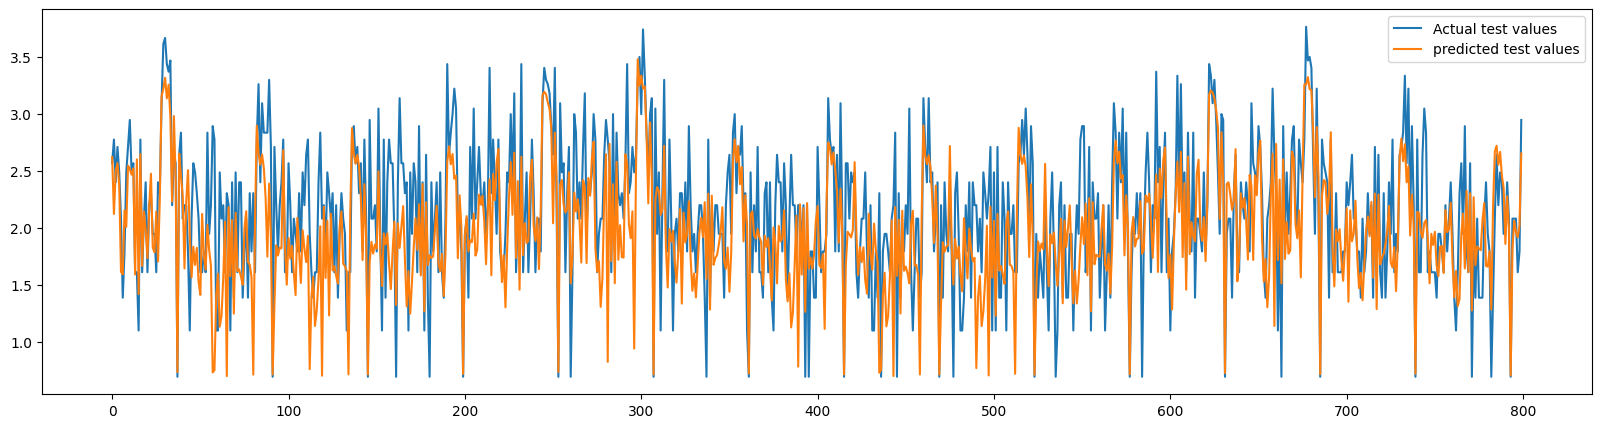

In [18]:
# Plot predicted & actual values
y_list = y_pred.tolist()
sns.reset_defaults()
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(y_validation[0:800], label='Actual test values')
ax.plot(y_list[0:800], label = "predicted test values")
plt.legend()
plt.show()

In [21]:
print("mse: ", loss[len(loss)-1])
print("rmsle: ", rmsle[len(rmsle)-1])

mse:  0.17294572293758392
rmsle:  0.1538141816854477
